In [21]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

**Models For DoW Attack Detection based on Multivariate Distribution Outlier Detection**

1. Isolation Forest
2. Local Outlier Factor (LOF)
3. Elliptic Envelope
4. One-Class Support Vector Machine (SVM)

These models are designed to identify outliers in multivariate datasets by considering the distribution and relationships among multiple features simultaneously. Each model has its strengths and may perform differently based on the characteristics of the dataset and the nature of the anomalies being detected. Therefore, it's essential to experiment with different models to determine which one best suits the specific requirements of the detection task.

**Isolation Forest Model for DoW Attack Detection Based on Multivariate Distribution Outlier Detection**

These models are designed to identify outliers in multivariate datasets by considering the distribution and relationships among multiple features simultaneously. Each model has its strengths and may perform differently based on the characteristics of the dataset and the nature of the anomalies being detected. Therefore, it's essential to experiment with different models to determine which one best suits the specific requirements of the detection task.

**Reasons for Using the Isolation Forest Model**

1. Efficient Anomaly Detection: Isolation Forest is known for its efficiency in identifying anomalies, particularly in high-dimensional datasets. It constructs isolation trees by randomly selecting features and splitting data points, isolating anomalies more quickly than traditional methods.

2. Multivariate Distribution Analysis: Unlike some other models that focus on univariate outlier detection, Isolation Forest considers the multivariate distribution of the data. This capability allows it to capture complex relationships and interactions among different features, which is crucial for detecting anomalies in function workloads where multiple metrics may exhibit abnormal behavior simultaneously.

3. Scalability: Isolation Forest is well-suited for large-scale datasets commonly encountered in cybersecurity applications. Its efficient algorithm and low computational complexity make it scalable to analyze large volumes of data efficiently, which is essential for timely detection of DoW attacks.

4. Robust to Noise: Isolation Forest is robust to noise and outliers present in the data. It can effectively handle skewed distributions and data with varying levels of noise, making it suitable for real-world datasets where the presence of noisy or irrelevant features is common.

5. Interpretability: Isolation Forest provides interpretable results, allowing for a clear understanding of the detected anomalies. By isolating anomalous data points in the feature space, it enables analysts to interpret the reasons behind the detected anomalies, facilitating further investigation and response.

Overall, Isolation Forest offers a combination of efficiency, scalability, and effectiveness in detecting anomalies in multivariate datasets, making it a compelling choice for our analysis of function workloads to detect anomalies indicative of DoW attacks.







In [4]:
# Load the dataset
data = pd.read_csv('dataset.csv')

In [5]:
# Converting Categorical Variables to Numerical Variables
data['bot'] = data['bot'].astype(int)
data = pd.get_dummies(data, columns = ['vmcategory'])

In [6]:
# Dropping irrelevant columns from the dataset
data.drop(columns=['Id', 'IP', 'FunctionId', 'functionTrigger', 'timestamp'], inplace=True)


In [7]:
# Splitting the dataset into features and labels (X = Features, y = Labels)
X = data.drop(columns=['bot'])
y = data['bot']

In [9]:
# Normalizing the Features
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [10]:
# Split data into training and testing sets with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

# **Building an Isolation Forest Model**
**Code Explanation**

In this section, we are developing an Isolation Forest model for anomaly detection based on multivariate distribution outlier detection.

# **Isolation Forest Model**

The Isolation Forest algorithm is an unsupervised learning method for anomaly detection. It identifies outliers by isolating them in a forest of decision trees. This approach is particularly effective for detecting anomalies in high-dimensional data with complex relationships.
The code IsolationForest(contamination=0.1, random_state=42) initializes an Isolation Forest model object with the following parameters:

1. contamination: The proportion of outliers in the data. Here, it is set to 0.1, indicating that approximately 10% of the data points are considered outliers.

2. random_state: Sets the random seed for reproducibility of the model training process. It ensures consistent results across different runs.

3. **Model Object (iso_forest)**
The model object iso_forest is instantiated with the Isolation Forest model configured with the specified parameters.

By creating the Isolation Forest model, we prepare to fit the model on the dataset and identify anomalies based on deviations from the majority of data points.
This approach allows us to detect anomalies in function workloads by analyzing processing time and content, providing a robust detection mechanism for Denial of Wallet (DoW) attacks.

In [11]:
# Building the Isolation Forest Classifier
# Instantiate the Isolation Forest model
iso_forest_clf = IsolationForest(contamination=0.1, random_state=42)

In [12]:
# Training the Classifier
iso_forest_clf.fit(X_train, y_train)

IsolationForest(contamination=0.1, random_state=42)

# **Making Predictions on the Testing Set**
# **Code Explanation**

In this section of the code, we utilize the trained Isolation Forest model to make predictions on the testing set.

1. **Prediction Process:**



*   The code y_pred = iso_forest.predict(X_test) generates predictions for the instances in the testing set using the trained Isolation Forest model (iso_forest) and the feature matrix of the testing set (X_test).
*   The Isolation Forest algorithm isolates anomalies by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.



*  This process is repeated recursively until all instances are isolated into individual trees or clusters, which allows for efficient outlier detection.


2. **Resulting Predictions:**


*   y_pred: This array contains the predicted labels for the instances in the testing set. Each label indicates whether the corresponding instance is an outlier (labeled as -1) or a normal data point (labeled as 1) according to the Isolation Forest model.
*   These predicted labels provide insights into the abnormality of each instance, with -1 indicating that an instance is likely to be an outlier or anomaly, and 1 indicating that an instance is considered normal.


By making predictions on the testing set, we evaluate the performance of the Isolation Forest model in detecting anomalies and assess its ability to generalize to unseen data.









In [14]:
# Making Predictions on the testing set
y_pred = iso_forest_clf.predict(X_test)

# **Performance Evaluation**


In [18]:
# Making predictions on the testing set and measuring the times

start_time = time.time()
y_pred = iso_forest_clf.predict(X_test)
end_time = time.time()

print('Start Time: ',start_time)
print('End Time: ',end_time)

Start Time:  1710345578.5793169
End Time:  1710345580.439968


In [19]:
# Calculating the Performance Overhead and Delay
overhead = end_time - start_time
delay = overhead / len(X_test)

print("Overhead (Time taken by the model to make predictions):", overhead, "seconds")
print("Delay (Average time taken per data point for prediction):", delay, "seconds")

Overhead (Time taken by the model to make predictions): 1.8606512546539307 seconds
Delay (Average time taken per data point for prediction): 3.3150734132484024e-05 seconds


In [26]:
# Evaluating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.62506458567178


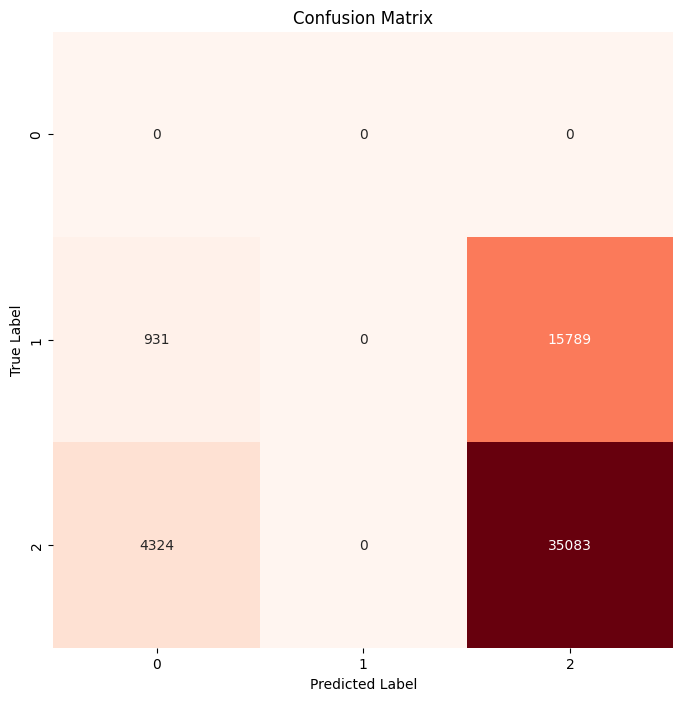

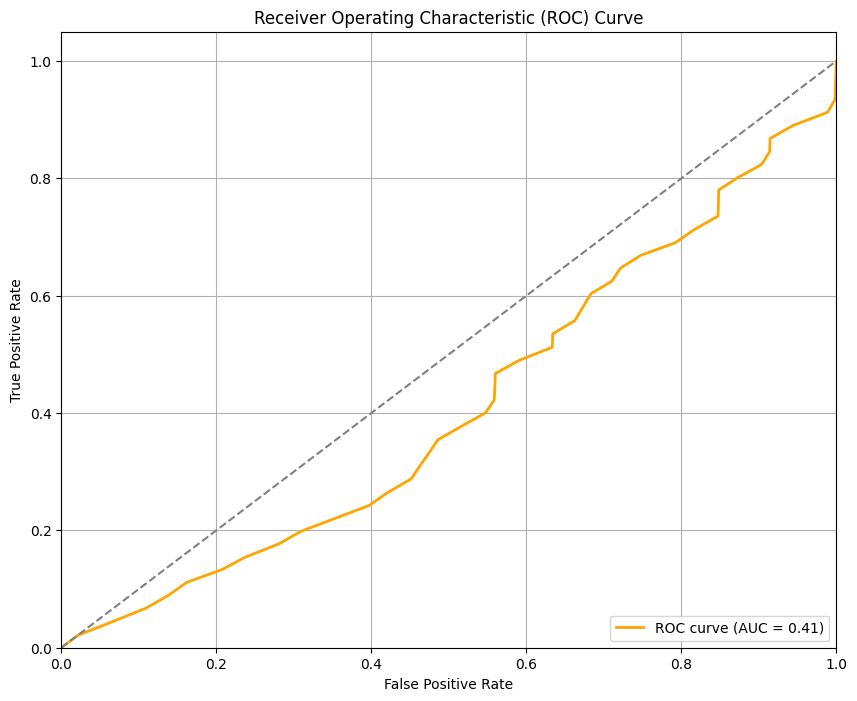

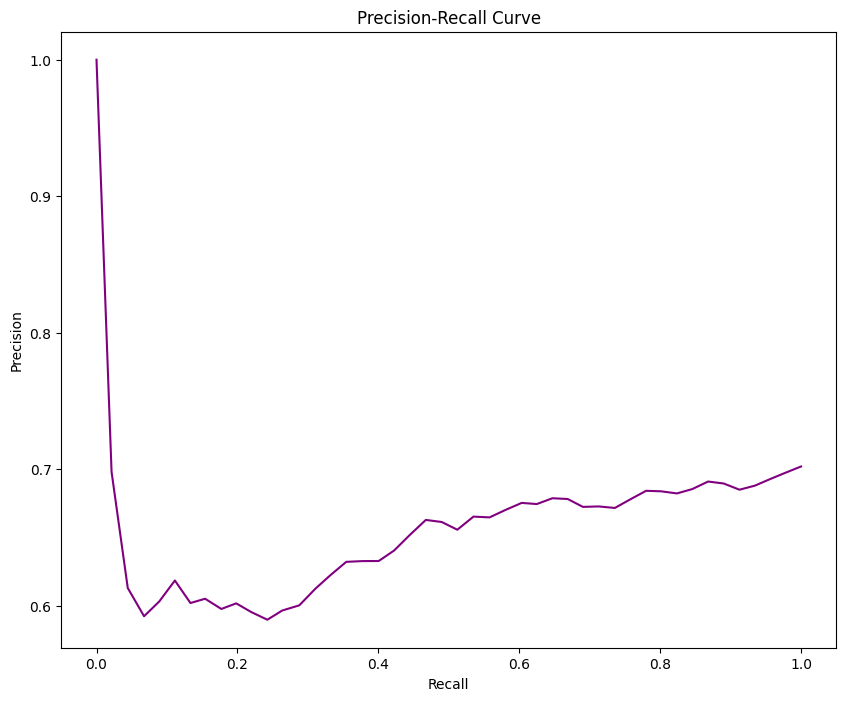

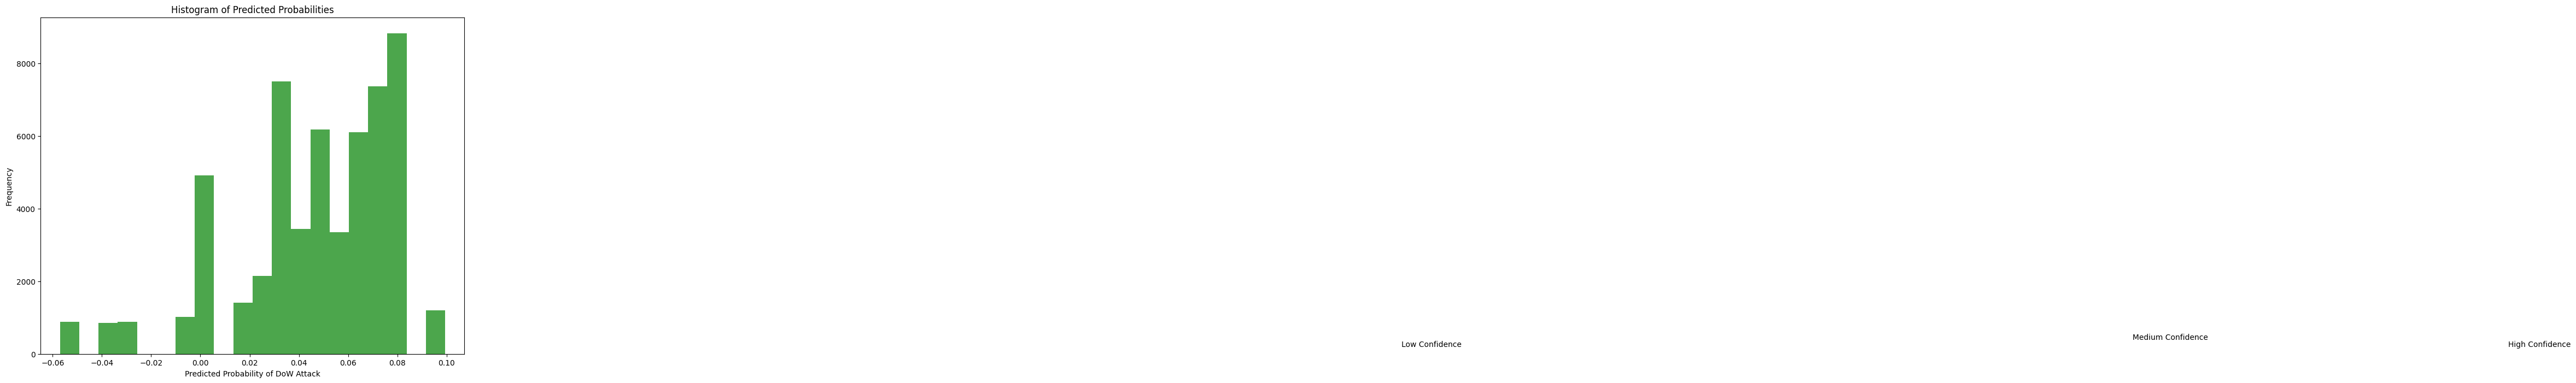

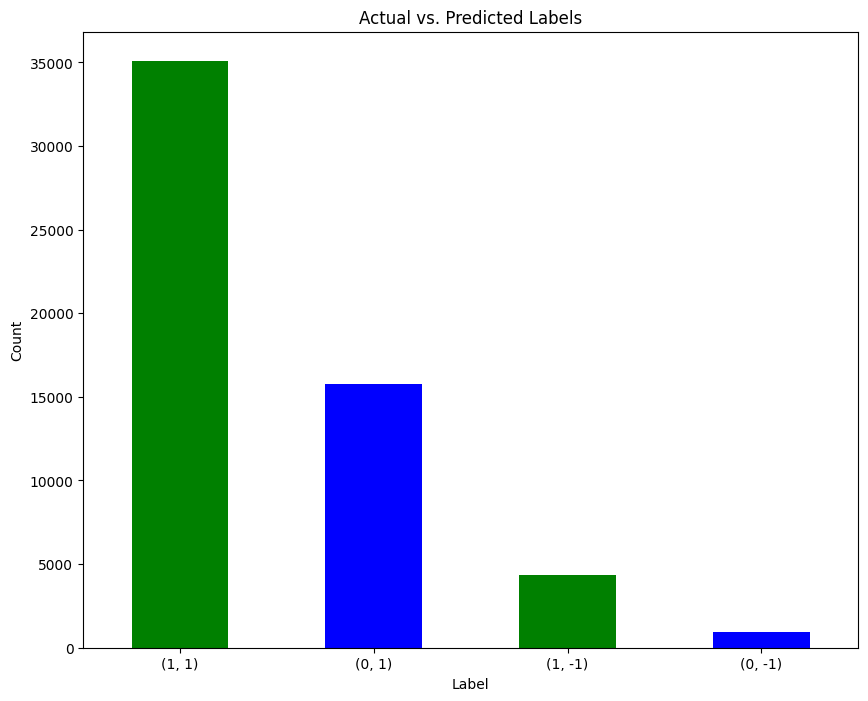

In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Calculate probabilities of predictions for class 1 (DoW attack)
y_prob = iso_forest_clf.decision_function(X_test)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Plotting the histogram of predicted probabilities
plt.figure(figsize=(10, 8))
plt.hist(y_prob, bins=20, color='green', alpha=0.7)

# Adding labels and titles
plt.xlabel('Predicted Probability of DoW Attack')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')

# Adding annotations
plt.text(0.5, 200, 'Low Confidence', fontsize=10, ha='center')
plt.text(0.8, 400, 'Medium Confidence', fontsize=10, ha='center')
plt.text(0.95, 200, 'High Confidence', fontsize=10, ha='center')

plt.show()


# Bar Chart of Actual vs. Predicted Labels
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 8))
actual_vs_predicted.value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Actual vs. Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
